In [1]:
import numpy as np
import pandas as pd

In [2]:
test = pd.read_csv('aug_test.csv')

In [3]:
train=pd.read_csv('aug_train.csv')

In [4]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


# So these are the features--->

In [6]:
train.shape

(19158, 14)

In [7]:
test.shape

(2129, 13)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [10]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [11]:
test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [12]:
train.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [13]:
test.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
count,2129.000000,2129,2129.000000,1621,2129,2098,2077,1817,2124,1507,1495,2089,2129.000000
unique,NaN,108,NaN,3,2,3,5,6,22,8,6,6,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN
freq,NaN,473,NaN,1460,1524,1519,1269,1621,383,338,1141,884,NaN
mean,16861.614843,NaN,0.824984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.983091
std,9576.846029,NaN,0.125074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.238660
min,3.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,8562.000000,NaN,0.698000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000
50%,16816.000000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000
75%,25129.000000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.000000


In [14]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [15]:
def fill_with_mode(dataframe, colname):
    mode = dataframe[colname].mode()[0]
    dataframe[colname].fillna(mode,inplace=True)
for i in train.select_dtypes(include = 'object').columns:
    fill_with_mode(train,i)
for j in test.select_dtypes(include = 'object').columns:
    fill_with_mode(test,j)

In [16]:
def fill_with_median(dataframe, colname):
    mode = dataframe[colname].mode()[0]
    dataframe[colname].fillna(mode, inplace=True)
for i in train.select_dtypes(include=['float64', 'int64']).columns:
    fill_with_median(train,i)
for j in test.select_dtypes(include=['float64', 'int64']).columns:
    fill_with_median(test,j)

In [17]:
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [18]:
test.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

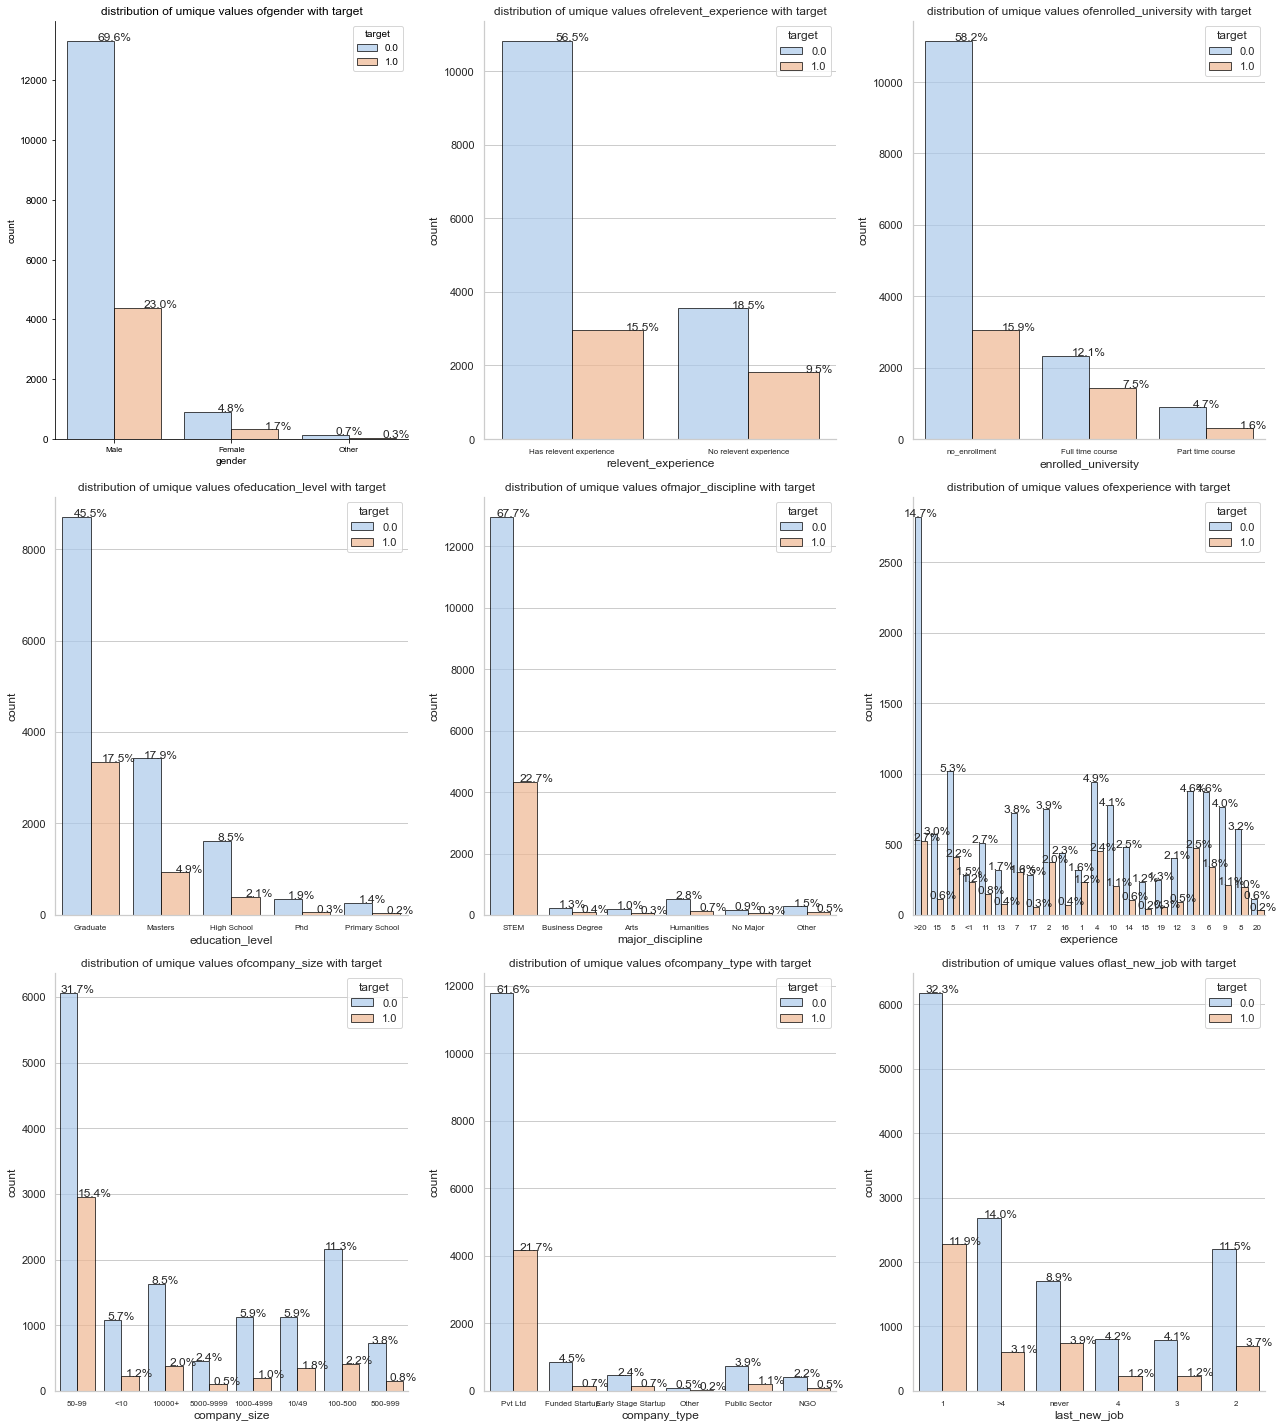

In [20]:
plt.figure(figsize=[18,20])
variables=['gender','relevent_experience','enrolled_university','education_level',
           'major_discipline','experience','company_size','company_type','last_new_job']
total = float(len(train))
n=1
for v in variables:
    plt.subplot(3,3,n)
    ax=sns.countplot(x=v, data = train, hue='target',alpha = 0.7, edgecolor='black',palette='pastel')
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.3)
    plt.title('distribution of umique values of{} with target'.format(v))
    plt.xticks(fontsize=8)
    plt.subplots_adjust(wspace=0.3)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_height()/total)
        x=p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    n = n+1
    plt.tight_layout()
    sns.despine()
    
plt.show()

C:\Users\robiu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


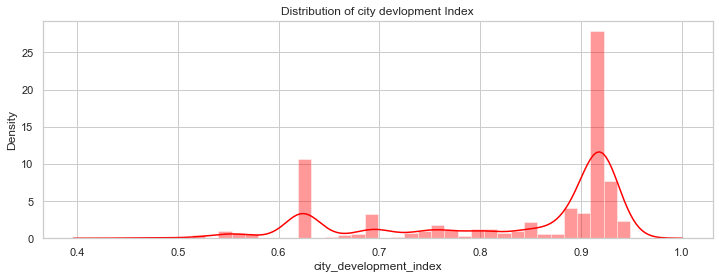

In [21]:
plt.figure(figsize = [12,4])
sns.distplot(train['city_development_index'],color = 'red')
plt.title('Distribution of city devlopment Index')
plt.show()

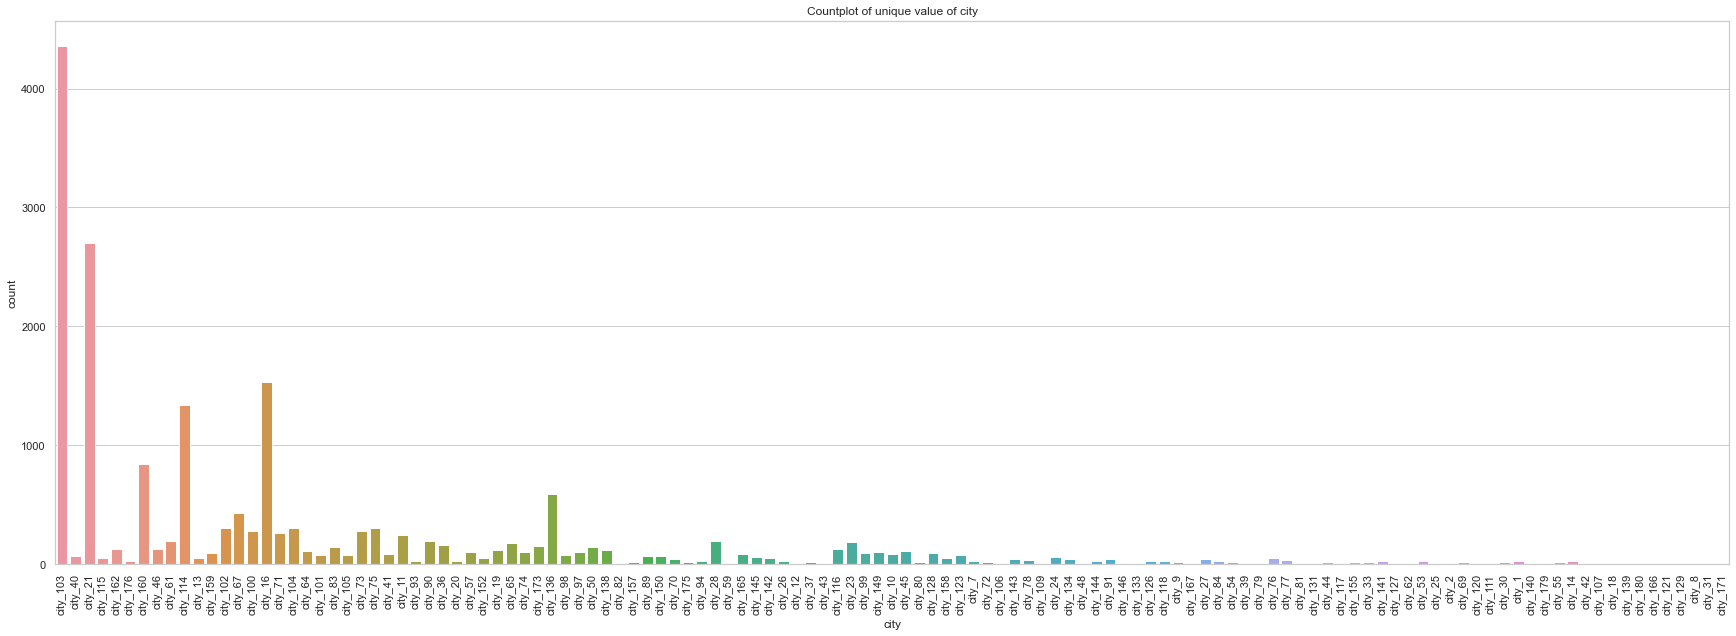

In [22]:
plt.figure(figsize=[30,10])
sns.countplot(x='city',data = train)
plt.title('Countplot of unique value of city')
plt.xticks(rotation=90)
plt.show()

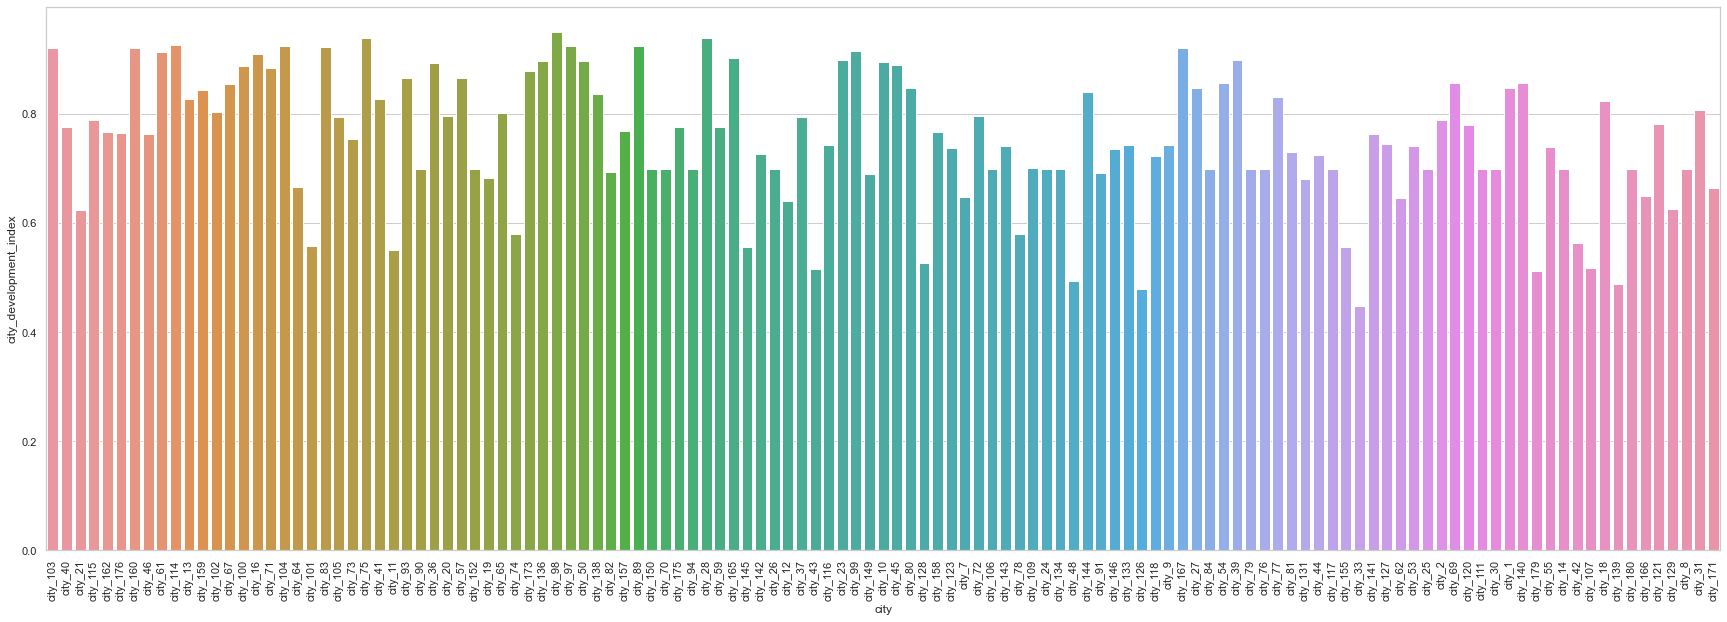

In [23]:
plt.figure(figsize=[30,10])
sns.barplot(data = train, x='city',y='city_development_index')
plt.xticks(rotation=90)
plt.show()

C:\Users\robiu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


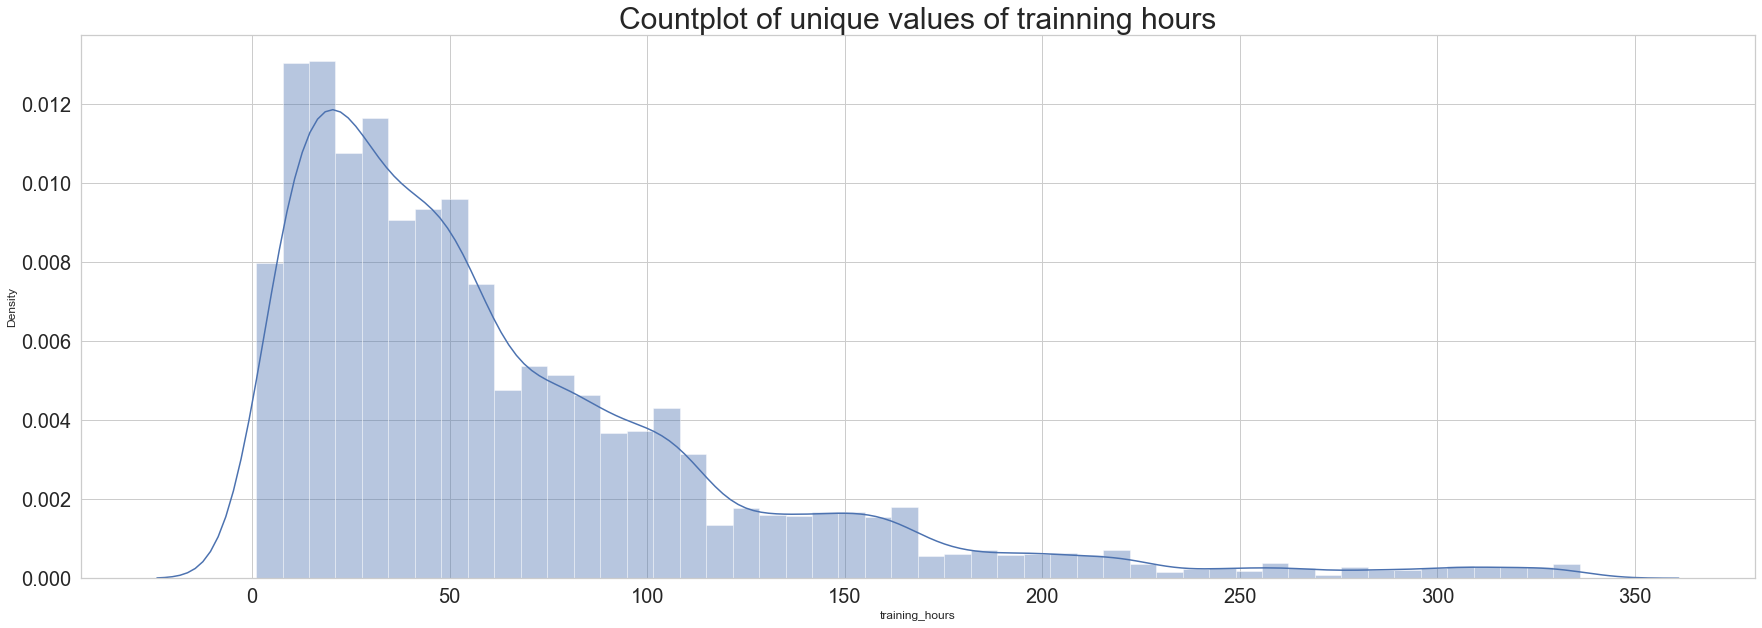

In [24]:
plt.figure(figsize=[30,10])
sns.distplot(train['training_hours'])
plt.title('Countplot of unique values of trainning hours', fontsize = '30')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

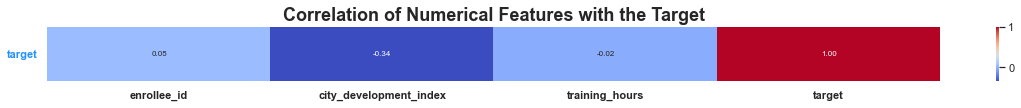

In [25]:
plt.figure(figsize=(20,1))
sns.heatmap(train.corr().sort_values(by= ['target'], ascending = False).head(1),cmap='coolwarm',
        annot = True, annot_kws={'size':8}, fmt='.2f')
    
plt.title('Correlation of Numerical Features with the Target', weight = 'bold',fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue',rotation=0)
plt.show()

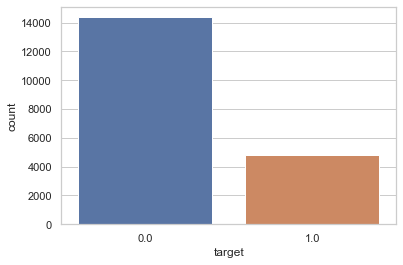

In [26]:
sns.countplot(x='target',data=train)
plt.show()

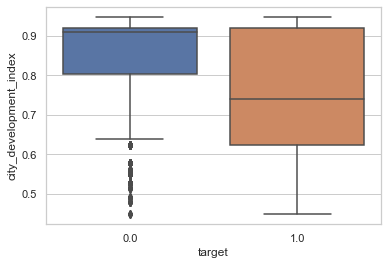

In [27]:
sns.boxplot(x='target', y='city_development_index', data=train)
plt.show()

In [28]:
gender_map ={
    'female'                 : 2,
    'Male'                   : 1,
    'Other'                  : 0
    }

relevent_experience_map ={
    'Has relevent experience' : 1,
    'No relevent experience'  : 0
    }

enrolled_university_map ={
    'no_enrollment'            : 0,
    'Full time course'         : 1,
    'Part time course'         : 3
    }

education_level_map ={
    'Primary_School_map'       : 0,
    'Graduate'                 : 2,
    'Masters'                  : 3,
    'High School'              : 1,
    'Phd'                      : 4
    }

major_map={
    'STEM'              : 0,
    'Business Degree'   : 1,
    'Arts'              : 2,
    'Humanities'        : 3,
    'No major'          : 4,
    'Other'             : 5
    }

experience_map ={
    '<1'  : 0,
    '2'   : 1,
    '3'   : 2,
    '4'   :3,
    '5'   :4,
    '6'   :5,
    '7'   :6,
    '8'   :7,
    '9'   :8,
    '10'  :9,
    '11'  :10,
    '12'  :11,
    '13'  :12,
    '14'  :13,
    '15'  :14,
    '16'  :15,
    '17'  :16,
    '18'  :17,
    '19'  :18,
    '20'  :19,
    '>20' :20
     }

company_type_map = {
    'Pvt Limited'        : 0,
    'Funded Startup'     : 1,
    'Early Stage Startup': 2,
    'Other'              : 3,
    'Public Sector'      : 4,
    'NGO'                : 5
    }

company_size_map = {
    '<10'      : 0,
    '10/49'    : 1,
    '100-500'  : 2,
    '1000-5000': 3,
    '10000'    : 4,
    '50-99'    : 5,
    '500-999'  : 6,
    '5000-9999': 7
    }

last_new_job_map = {
    'never' : 0,
    '1'     : 1,
    '2'     : 2,
    '3'     : 3,
    '4'     : 4,
    '>4'    : 5
    }

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [30]:
train.loc[:,'education_level'] = train['education_level'].map(education_level_map)

In [31]:
train.loc[:,'company_size'] = train['company_size'].map(company_size_map)

In [32]:
train.loc[:,'company_type'] = train['company_type'].map(company_type_map)

In [33]:
train.loc[:,'last_new_job'] = train['last_new_job'].map(last_new_job_map)

In [34]:
train.loc[:,'major_discipline'] = train['major_discipline'].map(major_map)

In [35]:
train.loc[:,'enrolled_university'] = train['enrolled_university'].map(enrolled_university_map)

In [36]:
train.loc[:,'relevent_experience'] = train['relevent_experience'].map(relevent_experience_map)

In [37]:
train.loc[:,'gender'] = train['gender'].map(gender_map)

In [38]:
train.loc[:,'experience'] = train['experience'].map(experience_map)

In [39]:
lb_en = LabelEncoder()

In [40]:
train.loc[:,'city'] = lb_en.fit_transform(train.loc[:,'city']) 

In [41]:
train.drop(['enrollee_id'], axis=1, inplace=True)

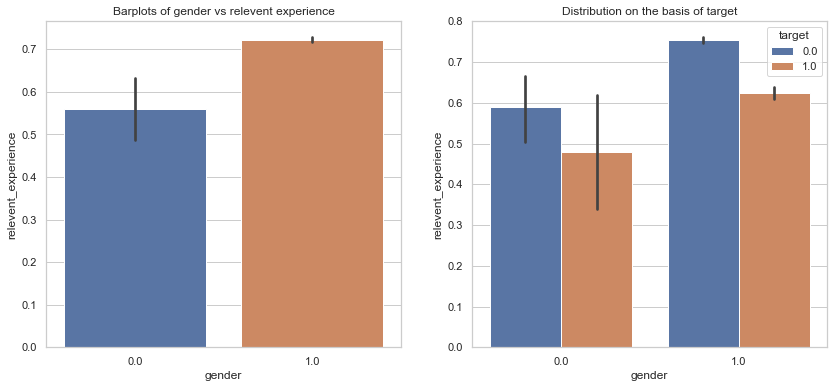

In [42]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=train, x='gender', y='relevent_experience')
plt.title('Barplots of gender vs relevent experience')
plt.subplot(1,2,2)
sns.barplot(data=train, x='gender', y='relevent_experience', hue='target')
plt.title('Distribution on the basis of target')

plt.show()

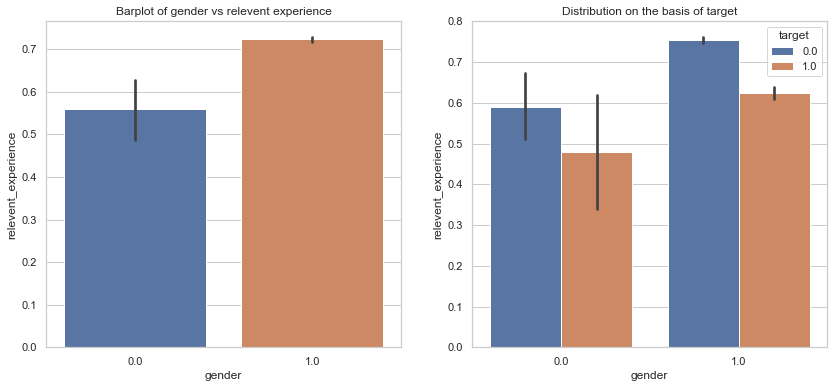

In [43]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot( data = train, x ='gender',y='relevent_experience')
plt.title('Barplot of gender vs relevent experience')
plt.subplot(1,2,2)
sns.barplot(data=train ,x='gender', y='relevent_experience', hue='target')
plt.title('Distribution on the basis of target')

plt.show()

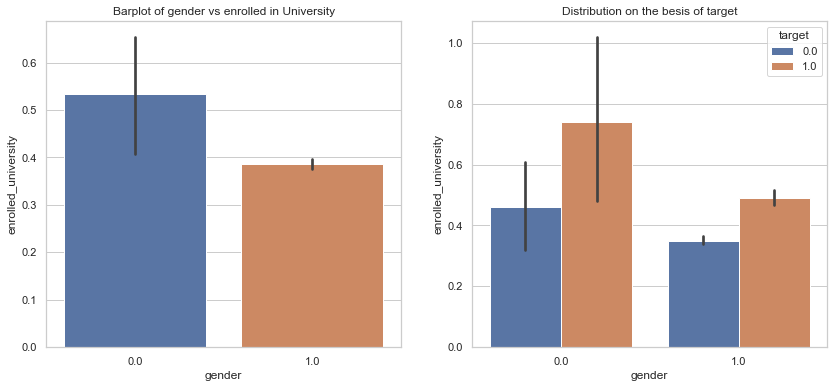

In [44]:
total = float(len(train))
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.barplot(data = train, x ='gender', y='enrolled_university')
plt.title('Barplot of gender vs enrolled in University')

plt.subplot(1,2,2)
sns.barplot(data = train, x = 'gender', y = 'enrolled_university', hue = 'target')
plt.title('Distribution on the besis of target')
plt.show()

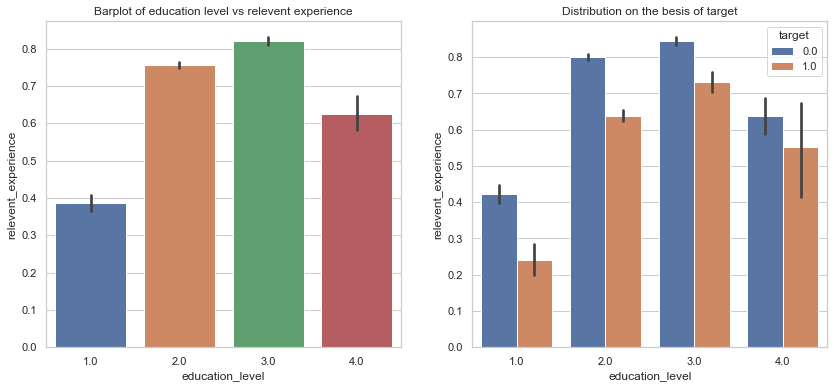

In [45]:
total = float(len(train))
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
sns.barplot(data=train, x= 'education_level', y = 'relevent_experience')
plt.title('Barplot of education level vs relevent experience')

plt.subplot(1,2,2)
sns.barplot(data=train, x='education_level', y = 'relevent_experience', hue='target')
plt.title('Distribution on the besis of target')

plt.show()

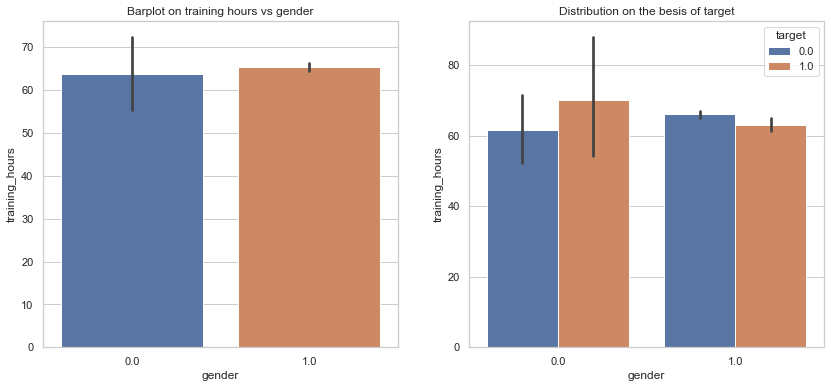

In [46]:
total = float(len(train))
plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
sns.barplot(data=train,y='training_hours',x= 'gender')
plt.title('Barplot on training hours vs gender')

plt.subplot(1,2,2)
sns.barplot(data=train, y='training_hours', x = 'gender', hue='target')
plt.title('Distribution on the besis of target')

plt.show()

# Modeling

In [47]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
X = train.drop("target", axis=1)
y = train["target"]

X_train, X_test, y, y_test = train_test_split(X,y, random_state=42, test_size=0.2, stratify=y)

In [57]:
from sklearn.naive_bayes import GaussianNB

In [58]:
gb = GaussianNB()
#gb.fit(X_train, y_train)
#gb.fit(X_train,y_train)
#print(classification_report(y_test, gb.predict(X_test)))

In [59]:
gb.fit()

GaussianNB()

In [60]:

gb.fit(X_train,y)
print(classification_report(y_test, gb.predict(X_test)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print(classification_report(y, gb.predict(X)))

In [ ]:
clf.fit(X_train, y_train)
print(classification_report(y_test, gb.predict(X_test)))

In [ ]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [ ]:
clf.fit(X, Y)

In [ ]:

print(clf.predict([[-0.8, -1]]))

In [ ]:
print(gb.score(X_train, y_train))

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print(classification_report(y_test, lr.predict(X_test)))

In [ ]:
print(lr.score(X_train, y_train))

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
print(classification_report(y_test, rfc.predict(X_test)))

In [ ]:
print(rfc.score(X_train, y_train))

In [ ]:

test.loc[:,'education_level'] = test['education_level'].map(education_level_map)
test.loc[:,'company_size'] = test['company_size'].map(company_size_map)
test.loc[:,'company_type'] = test['company_type'].map(company_type_map)
test.loc[:,'last_new_job'] = test['last_new_job'].map(last_new_job_map)
test.loc[:,'major_discipline'] = test['major_discipline'].map(major_map)
test.loc[:,'enrolled_university'] = test['enrolled_university'].map(enrolled_university_map)
test.loc[:,'relevent_experience'] = test['relevent_experience'].map(relevent_experience_map)
test.loc[:,'gender'] = test['gender'].map(gender_map)
test.loc[:,'experience'] = test['experience'].map(experience_map)

#encoding city feature using label encoder
lb_en = LabelEncoder()

test.loc[:,'city'] = lb_en.fit_transform(test.loc[:,'city']) 

In [ ]:
test.head()

In [ ]:
df_test=test.drop(["enrollee_id"],axis=1)

In [ ]:
predictions=rfc.predict(df_test.values)

In [ ]:
#Create a  DataFrame
submission = pd.DataFrame({'enrollee_id':test['enrollee_id'],'target':predictions})
                        

#Visualize the first 10 rows
submission.head(10)

In [ ]:
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)